Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor, Pool
from sklearn import tree

import time
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression




In [6]:
#!pip install catBoost

In [7]:
#!pip install ucimlrepo

Importing the Dataset

In [8]:
from ucimlrepo import fetch_ucirepo

census_income = fetch_ucirepo(id=20)

X = census_income.data.features
y = census_income.data.targets


Concating the dataset into a single dataframe

In [9]:
df = pd.concat([X, y], axis=1)

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


<ipython-input-11-db4eb2d4ff7a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # correlation matrix


<Axes: >

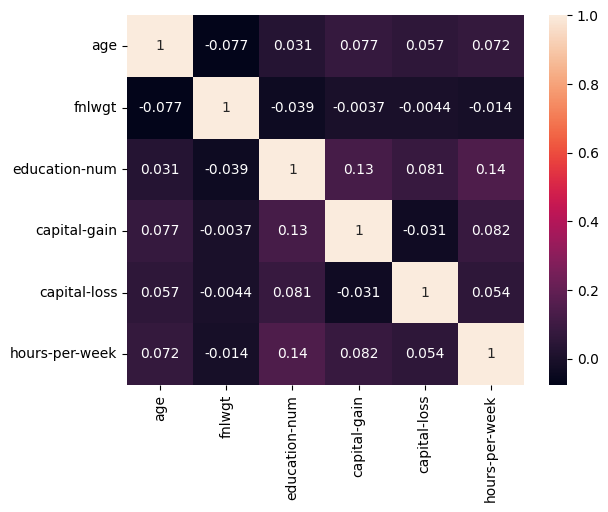

In [11]:
sns.heatmap(df.corr(), annot=True) # correlation matrix

In [12]:
y.nunique() # number of unique values in the target column

income    4
dtype: int64

In [13]:
df.nunique() # number of unique values in each column

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [14]:
df.info() # data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [15]:
df.isna().sum() # number of missing values in each column

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [16]:
y.value_counts() # number of each unique value in the target column

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

In [17]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0]) # fill missing values with the mode

In [18]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [19]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [20]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Label Encoding

In [21]:
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [22]:
income_map = {'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1}
df['income'] = df['income'].replace(income_map)

In [23]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['sex'] = label_encoder.fit_transform(df['sex'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])


In [24]:
df.drop(['education-num'],inplace=True,axis=1)

In [25]:
X = df.drop('income', axis=1)
y = df['income']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Gradient Boosting

In [27]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [28]:
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8666188965093664


In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

gs = RandomizedSearchCV(gb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=False)
gs.fit(X_train, y_train)
best_params1 = gs.best_params_

print(f'Best Parameters: {best_params1}')

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'learning_rate': 0.1}


In [30]:
start = time.time()


best_params1 = gs.best_params_
final_model1 = GradientBoostingClassifier(**best_params1)

final_model1.fit(X_train, y_train)
preds = final_model1.predict(X_test)
print(accuracy_score(y_test, preds))

end = time.time()
diff = end - start
print('Execution time for Gradient Boosting (in Seconds):', diff)

0.8721465861398301
Execution time for Gradient Boosting (in Seconds): 10.474773645401001


XG BOOOST

In [31]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8705087521752483


In [33]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

gs = RandomizedSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=False)
gs.fit(X_train, y_train)
best_params2 = gs.best_params_

print(f'Best Parameters: {best_params2}')

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'learning_rate': 0.1}


In [34]:
start = time.time()


best_params2 = gs.best_params_
final_model2 = XGBClassifier(**best_params2)

final_model2.fit(X_train, y_train)
preds = final_model2.predict(X_test)
print(accuracy_score(y_test, preds))

end = time.time()
diff = end - start
print('Execution time for XGB (in Seconds):', diff)

0.8732725969904801
Execution time for XGB (in Seconds): 0.7770893573760986


CAT BOOST

In [35]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

Learning rate set to 0.049279
0:	learn: 0.6473565	total: 59.1ms	remaining: 59.1s
1:	learn: 0.6077405	total: 69.6ms	remaining: 34.7s
2:	learn: 0.5708311	total: 80.5ms	remaining: 26.7s
3:	learn: 0.5457662	total: 98.3ms	remaining: 24.5s
4:	learn: 0.5178883	total: 109ms	remaining: 21.7s
5:	learn: 0.4950409	total: 119ms	remaining: 19.8s
6:	learn: 0.4762088	total: 130ms	remaining: 18.4s
7:	learn: 0.4616567	total: 144ms	remaining: 17.9s
8:	learn: 0.4477814	total: 156ms	remaining: 17.1s
9:	learn: 0.4346619	total: 167ms	remaining: 16.5s
10:	learn: 0.4228166	total: 179ms	remaining: 16.1s
11:	learn: 0.4123469	total: 191ms	remaining: 15.8s
12:	learn: 0.4027794	total: 206ms	remaining: 15.6s
13:	learn: 0.3937037	total: 222ms	remaining: 15.6s
14:	learn: 0.3864730	total: 248ms	remaining: 16.3s
15:	learn: 0.3808396	total: 259ms	remaining: 15.9s
16:	learn: 0.3752560	total: 269ms	remaining: 15.6s
17:	learn: 0.3703324	total: 281ms	remaining: 15.3s
18:	learn: 0.3663058	total: 292ms	remaining: 15.1s
19:	lea

In [36]:
y_pred = cat.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8737844201044119


In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

gs = RandomizedSearchCV(cat, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
best_params3 = gs.best_params_

print(f'Best Parameters: {best_params3}')

0:	learn: 0.6050870	total: 14.2ms	remaining: 2.82s
1:	learn: 0.5337826	total: 27.8ms	remaining: 2.76s
2:	learn: 0.4858251	total: 38.6ms	remaining: 2.53s
3:	learn: 0.4551802	total: 49.8ms	remaining: 2.44s
4:	learn: 0.4281924	total: 60.8ms	remaining: 2.37s
5:	learn: 0.4067747	total: 71.9ms	remaining: 2.33s
6:	learn: 0.3912637	total: 83ms	remaining: 2.29s
7:	learn: 0.3815388	total: 93.7ms	remaining: 2.25s
8:	learn: 0.3721886	total: 104ms	remaining: 2.21s
9:	learn: 0.3648265	total: 115ms	remaining: 2.18s
10:	learn: 0.3576073	total: 125ms	remaining: 2.15s
11:	learn: 0.3511872	total: 136ms	remaining: 2.13s
12:	learn: 0.3456635	total: 148ms	remaining: 2.13s
13:	learn: 0.3406223	total: 160ms	remaining: 2.12s
14:	learn: 0.3370864	total: 171ms	remaining: 2.1s
15:	learn: 0.3343267	total: 181ms	remaining: 2.08s
16:	learn: 0.3314352	total: 195ms	remaining: 2.1s
17:	learn: 0.3281063	total: 206ms	remaining: 2.09s
18:	learn: 0.3258869	total: 221ms	remaining: 2.1s
19:	learn: 0.3238423	total: 231ms	rema

In [38]:
start = time.time()


best_params3 = gs.best_params_
final_model3 = CatBoostClassifier(**best_params3,verbose=False)

final_model3.fit(X_train, y_train)
preds = final_model3.predict(X_test)
print(accuracy_score(y_test, preds))

end = time.time()
diff = end - start
print('Execution time for Cat Boost (in Seconds):', diff)

0.874091513972771
Execution time for Cat Boost (in Seconds): 3.7009212970733643


Light Gradient Boosting

In [39]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 9332, number of negative: 29741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238835 -> initscore=-1.159077
[LightGBM] [Info] Start training from score -1.159077


LGBMClassifier()

In [40]:
y_pred = lgbm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8726584092537619


In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

gs = RandomizedSearchCV(lgbm, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=False)
gs.fit(X_train, y_train)
best_params4 = gs.best_params_

print(f'Best Parameters: {best_params4}')

[LightGBM] [Info] Number of positive: 9332, number of negative: 29741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238835 -> initscore=-1.159077
[LightGBM] [Info] Start training from score -1.159077
Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'learning_rate': 0.1}


In [42]:
start = time.time()


best_params4 = gs.best_params_
final_model4 = LGBMClassifier(**best_params4)

final_model4.fit(X_train, y_train)
preds = final_model4.predict(X_test)
print(accuracy_score(y_test, preds))

end = time.time()
diff = end - start
print('Execution time for LGBM (in Seconds):', diff)

[LightGBM] [Info] Number of positive: 9332, number of negative: 29741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238835 -> initscore=-1.159077
[LightGBM] [Info] Start training from score -1.159077
0.8726584092537619
Execution time for LGBM (in Seconds): 0.646803617477417


Stacking Models

In [43]:
base_models = [
    ('gb', GradientBoostingClassifier(**best_params1)),
    ('xgb', XGBClassifier(**best_params2)),
    ('cat', CatBoostClassifier(**best_params3)),
    ('lgbm', LGBMClassifier(**best_params4))
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=1)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)

print('Stacking Accuracy:', accuracy_score(y_test, stacking_pred))



0:	learn: 0.6050870	total: 10.8ms	remaining: 2.14s
1:	learn: 0.5337826	total: 21.7ms	remaining: 2.15s
2:	learn: 0.4858251	total: 32.5ms	remaining: 2.13s
3:	learn: 0.4551802	total: 42.9ms	remaining: 2.1s
4:	learn: 0.4281924	total: 53.4ms	remaining: 2.08s
5:	learn: 0.4067747	total: 64.3ms	remaining: 2.08s
6:	learn: 0.3912637	total: 75.2ms	remaining: 2.07s
7:	learn: 0.3815388	total: 85.9ms	remaining: 2.06s
8:	learn: 0.3721886	total: 96.4ms	remaining: 2.05s
9:	learn: 0.3648265	total: 108ms	remaining: 2.04s
10:	learn: 0.3576073	total: 118ms	remaining: 2.03s
11:	learn: 0.3511872	total: 129ms	remaining: 2.02s
12:	learn: 0.3456635	total: 139ms	remaining: 2s
13:	learn: 0.3406223	total: 150ms	remaining: 1.99s
14:	learn: 0.3370864	total: 161ms	remaining: 1.98s
15:	learn: 0.3343267	total: 171ms	remaining: 1.97s
16:	learn: 0.3314352	total: 182ms	remaining: 1.95s
17:	learn: 0.3281063	total: 193ms	remaining: 1.95s
18:	learn: 0.3258869	total: 204ms	remaining: 1.94s
19:	learn: 0.3238423	total: 219ms	re

Insights




Model Comparison Before and After Tuning:*

   - Gradient Boosting:* Improved from 86.6% to 87.08% after tuning.
   - XGBoost: Improved from 87.05% to 87.5% after tuning, showing a more significant improvement compared to Gradient Boosting.
   - CatBoost: Slightly improved from 87.3% to 87.4% after tuning. The minimal improvement suggests that CatBoost was already performing optimally or that the tuning parameters had marginal impact.
   - LightGBM (LGBM): Stayed the same at 87.2% even after tuning, indicating either the model was at its optimal performance with the initial parameters, or the tuning did not enhance its predictive capabilities.
   - Stacking: Combining all models and using logistic regression as the meta-model reached an accuracy of 87.5%, matching the highest performance achieved by any single model (XGBoost after tuning).


   - Tuning Impact: The varying improvements across models after tuning highlight the significance of hyperparameter optimization. XGBoost and Gradient Boosting show notable improvements, whereas CatBoost and LGBM exhibit marginal to no gains, suggesting differences in sensitivity to parameter adjustments.
   - Consistency vs. Improvement: LGBM's consistent performance suggests robustness to overfitting but also indicates a potential ceiling in performance with the given features and dataset. In contrast, the notable improvement in XGBoost after tuning suggests a higher dependency on appropriate hyperparameter settings.
   - Model Complexity and Performance: Despite their inherent differences in handling data and building trees, the final accuracies of these models are quite close, indicating that all are competitive for this particular task.